# Experiment-5

## a) Consider Titanic dataset & handle the missing values using different methods.
## b) Consider Titanic (or any other dataset) & detect the outliers & handle the outerliers
## c)Consider any relevant dataset and perform data transformation operations

## a) Consider Titanic dataset & handle the missing values using different methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('D:/dip(AIML(cse))/kaggle/titanic.csv')

In [2]:
titanic_df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## ->Replacing the missing values with arbitrary value

In [3]:
titanic_df['deck'] = titanic_df['deck'].fillna('A')

## ->Replacing the missing values for numerical columns with mean

In [4]:
mean = titanic_df['age'].mean()
titanic_df['age'] = titanic_df['age'].fillna(mean)

In [5]:
mode = titanic_df['deck'].mode()[0]
mode

'A'

## ->Replacing the missing values for categorical columns with mode

In [6]:
mode = titanic_df['deck'].mode()[0]
titanic_df['deck'] = titanic_df['deck'].fillna(mode)

## ->Replacing the missing values for numerical columns with median

In [7]:
median = titanic_df['age'].median()
titanic_df['age']= titanic_df['age'].fillna(median)

In [8]:
titanic_df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

## ->Update the csv file

In [9]:
titanic_df.to_csv('Cleaned_Titanic.csv', index=False)

## b) Consider Titanic (or any other dataset) & detect the outliers & handle the outerliers

## ->Scatter plot to detect outliers

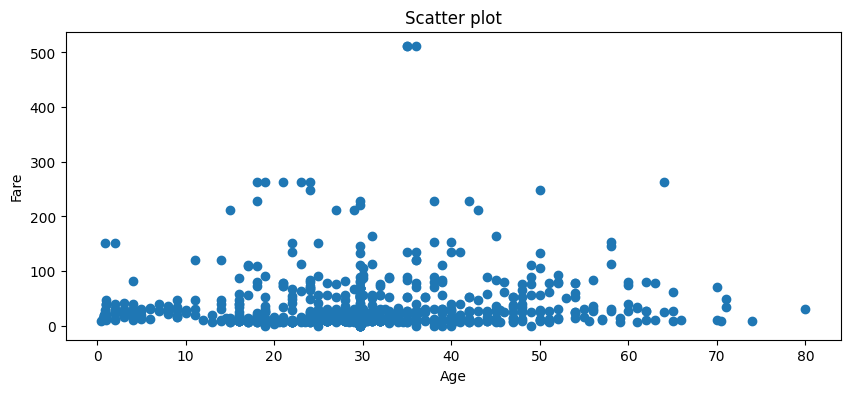

In [10]:
fig,ax = plt.subplots(figsize=(10,4))
ax.scatter(titanic_df['age'],titanic_df['fare'])
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.title("Scatter plot")
plt.show()

## ->Box plot to detect outliers

<Axes: >

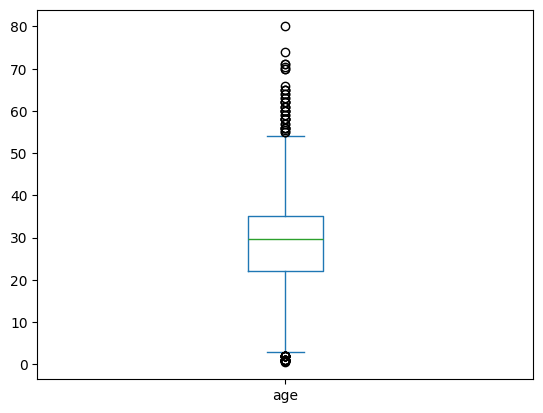

In [11]:
titanic_df['age'].plot(kind='box')

## ->Handle the outerliers using IQR method

In [12]:
# finding the 1st quartile
q1 = titanic_df["age"].quantile(0.25)
# finding the 3rd quartile
q3 = titanic_df['age'].quantile(0.75)
# finding the iqr region
iqr = q3-q1
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)

In [13]:
age_arr = titanic_df["age"]
outliers = age_arr[(age_arr <= lower_bound) | (age_arr >= upper_bound)]
print('The following are the outliers in the boxplot of age:\n',outliers)

The following are the outliers in the boxplot of age:
 7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
827     1.00
829    62.00
831     0.83
851    74.00
879    56.00
Name: age, Length: 66, dtype: float64


## ->Histogram plot to detect outliers

<Axes: ylabel='Frequency'>

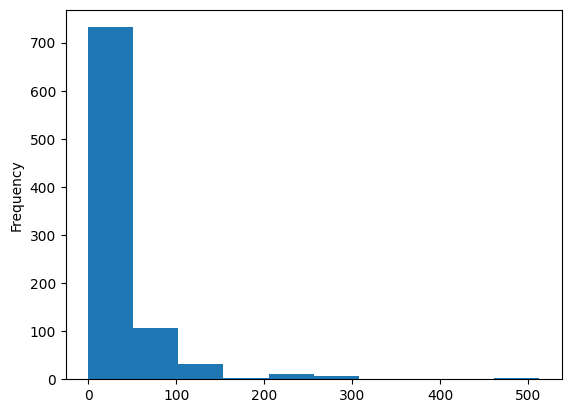

In [14]:
titanic_df['fare'].plot(kind='hist')

## ->Remove data objects with outliers

In [15]:
upperIndex = titanic_df[titanic_df['age']>upper_bound].index
titanic_df.drop(upperIndex,inplace=True)
lowerIndex = titanic_df[titanic_df['age']<lower_bound].index
titanic_df.drop(lowerIndex,inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     825 non-null    int64  
 1   pclass       825 non-null    int64  
 2   sex          825 non-null    object 
 3   age          825 non-null    float64
 4   sibsp        825 non-null    int64  
 5   parch        825 non-null    int64  
 6   fare         825 non-null    float64
 7   embarked     824 non-null    object 
 8   class        825 non-null    object 
 9   who          825 non-null    object 
 10  adult_male   825 non-null    bool   
 11  deck         825 non-null    object 
 12  embark_town  824 non-null    object 
 13  alive        825 non-null    object 
 14  alone        825 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 91.8+ KB


## ->Replacing outliers with upper and lower cap

In [16]:
fare_arr = titanic_df["fare"]
lower_cap = np.percentile(fare_arr,1)
upper_cap = np.percentile(fare_arr,99)

<Axes: ylabel='Frequency'>

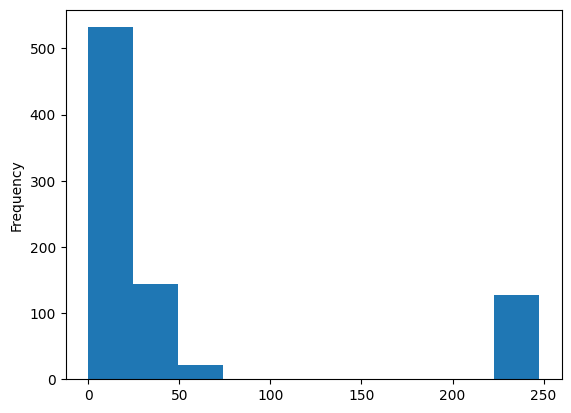

In [17]:
for i in titanic_df['fare']:
    if i<lower_bound :
        titanic_df['fare'] = titanic_df['fare'].replace(i,lower_cap)
    elif i>upper_bound :
        titanic_df['fare'] = titanic_df['fare'].replace(i,upper_cap)
titanic_df['fare'].plot(kind='hist')

## ->Replacing outliers with Mean

In [18]:
m = np.mean(titanic_df['age'])
print('mean:',m)
for i in titanic_df['age']:
    if i<lower_bound or i>upper_bound :
        titanic_df['age'] = titanic_df['age'].replace(i,m)

mean: 28.879689483065953


## ->Replacing outliers with median

In [20]:
m1 = titanic_df['age'].median()
print(m)
for i in titanic_df['age']:
    if i<lower_bound or i>upper_bound :
        titanic_df['age'] = titanic_df['age'].replace(i,m1)

28.879689483065953


## c)Consider any relevant dataset and perform data transformation operations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.Given the event dataset which contains Day,Event,Cost columns

In [3]:
df=pd.read_csv('D:/dip(AIML(cse))/kaggle/cmp.csv')
df.head()

,date,event,cost
0,12-09-2010,game,10000
1,13-08-2012,dance,12000
2,14-03-2003,songs,3000
3,15-07-2010,drawing,10000
4,16-02-2006,songs,6000


## ->Add two new columns Discount and Discounted_Price

In [4]:
#Discount
df['discount']=df.apply(lambda x: (x.cost*0.1),axis=1)
print(df)

         date    event   cost  discount
0  12-09-2010     game  10000    1000.0
1  13-08-2012    dance  12000    1200.0
2  14-03-2003    songs   3000     300.0
3  15-07-2010  drawing  10000    1000.0
4  16-02-2006    songs   6000     600.0
5  17-01-2007    dance   7000     700.0
6  18-06-2006  drawing   6000     600.0
7  19-11-2002     game   2111     211.1
8  20-05-2015    dance  15000    1500.0
9  21-12-2009     game   9111     911.1


In [5]:
#discount_prize
df['discount_prize']=df.apply(lambda x: x.cost-(x.cost*0.1),axis=1)
print(df)

         date    event   cost  discount  discount_prize
0  12-09-2010     game  10000    1000.0          9000.0
1  13-08-2012    dance  12000    1200.0         10800.0
2  14-03-2003    songs   3000     300.0          2700.0
3  15-07-2010  drawing  10000    1000.0          9000.0
4  16-02-2006    songs   6000     600.0          5400.0
5  17-01-2007    dance   7000     700.0          6300.0
6  18-06-2006  drawing   6000     600.0          5400.0
7  19-11-2002     game   2111     211.1          1899.9
8  20-05-2015    dance  15000    1500.0         13500.0
9  21-12-2009     game   9111     911.1          8199.9


## -> Add two more events data-objects to the dataset

In [6]:
df.loc[len(df.index)]=['12-01-2007','songs',6000,600.0,5400.0]
print(df)

          date    event   cost  discount  discount_prize
0   12-09-2010     game  10000    1000.0          9000.0
1   13-08-2012    dance  12000    1200.0         10800.0
2   14-03-2003    songs   3000     300.0          2700.0
3   15-07-2010  drawing  10000    1000.0          9000.0
4   16-02-2006    songs   6000     600.0          5400.0
5   17-01-2007    dance   7000     700.0          6300.0
6   18-06-2006  drawing   6000     600.0          5400.0
7   19-11-2002     game   2111     211.1          1899.9
8   20-05-2015    dance  15000    1500.0         13500.0
9   21-12-2009     game   9111     911.1          8199.9
10  12-01-2007    songs   6000     600.0          5400.0


In [7]:
df1=pd.read_csv('D:/dip(AIML(cse))/kaggle/cmp1.csv')
print(df1)

         date    event   cost
0  11-05-2006     game  10000
1  12-04-2007    dance  12000
2  13-03-2008    songs   3000
3  14-12-2012  drawing  10000
4  15-05-2020    songs   6000
5  16-08-2015    dance   7000
6  17-11-2004  drawing   6000
7  18-05-2019     game   2111
8  19-01-2006    dance  15000
9  20-09-2016     game   9111


In [8]:
df1['discount']=df1.apply(lambda x: (x.cost*0.1),axis=1)
print(df1)

         date    event   cost  discount
0  11-05-2006     game  10000    1000.0
1  12-04-2007    dance  12000    1200.0
2  13-03-2008    songs   3000     300.0
3  14-12-2012  drawing  10000    1000.0
4  15-05-2020    songs   6000     600.0
5  16-08-2015    dance   7000     700.0
6  17-11-2004  drawing   6000     600.0
7  18-05-2019     game   2111     211.1
8  19-01-2006    dance  15000    1500.0
9  20-09-2016     game   9111     911.1


In [9]:
df['discount_prize']=df.apply(lambda x: x.cost-(x.cost*0.1),axis=1)
print(df)

          date    event   cost  discount  discount_prize
0   12-09-2010     game  10000    1000.0          9000.0
1   13-08-2012    dance  12000    1200.0         10800.0
2   14-03-2003    songs   3000     300.0          2700.0
3   15-07-2010  drawing  10000    1000.0          9000.0
4   16-02-2006    songs   6000     600.0          5400.0
5   17-01-2007    dance   7000     700.0          6300.0
6   18-06-2006  drawing   6000     600.0          5400.0
7   19-11-2002     game   2111     211.1          1899.9
8   20-05-2015    dance  15000    1500.0         13500.0
9   21-12-2009     game   9111     911.1          8199.9
10  12-01-2007    songs   6000     600.0          5400.0


## ->Consider the same dataset from another csv file merge the two csv file and save it to 3rd csv file

In [10]:
df=pd.read_csv('D:/dip(AIML(cse))/kaggle/cmp.csv')
df3=pd.concat([df,df1],ignore_index=True)
df3

,date,event,cost,discount
0,12-09-2010,game,10000,NaN
1,13-08-2012,dance,12000,NaN
2,14-03-2003,songs,3000,NaN
3,15-07-2010,drawing,10000,NaN
4,16-02-2006,songs,6000,NaN
5,17-01-2007,dance,7000,NaN
6,18-06-2006,drawing,6000,NaN
7,19-11-2002,game,2111,NaN
8,20-05-2015,dance,15000,NaN
9,21-12-2009,game,9111,NaN


## 2.Read two csv files given below and perform the following

In [11]:
import pandas as ps
df4=pd.read_csv('D:/dip(AIML(cse))/kaggle/s1.csv')
df4


,sid,maths,science
0,1,52,52
1,2,65,62
2,3,64,89
3,4,98,97
4,5,62,85


In [12]:
df5=pd.read_csv('D:/dip(AIML(cse))/kaggle/s2.csv')
df5

,sid,maths,science
0,0,52,52
1,1,65,62
2,2,64,89
3,3,98,97
4,4,62,85


## ->Add a new attribute called total by summing maths and science

In [13]:
df5['total']=df5[['maths','science']].sum(axis=1)
df5

,sid,maths,science,total
0,0,52,52,104
1,1,65,62,127
2,2,64,89,153
3,3,98,97,195
4,4,62,85,147


## ->Add a new object to the final dataframe

In [14]:
df5.loc[len(df5.index)]=[6,65,68,133]
df5

,sid,maths,science,total
0,0,52,52,104
1,1,65,62,127
2,2,64,89,153
3,3,98,97,195
4,4,62,85,147
5,6,65,68,133


## ->Merge the two dataframes on sid

In [15]:
df_mearge=pd.merge(df4,df5,on='sid',how='outer')
df_mearge

,sid,maths_x,science_x,maths_y,science_y,total
0,0,NaN,NaN,52.0,52.0,104.0
1,1,52.0,52.0,65.0,62.0,127.0
2,2,65.0,62.0,64.0,89.0,153.0
3,3,64.0,89.0,98.0,97.0,195.0
4,4,98.0,97.0,62.0,85.0,147.0
5,5,62.0,85.0,NaN,NaN,NaN
6,6,NaN,NaN,65.0,68.0,133.0


In [16]:
#droping null values
df_mearge.dropna(inplace=True,axis=0)
df_mearge.head(5)

,sid,maths_x,science_x,maths_y,science_y,total
1,1,52.0,52.0,65.0,62.0,127.0
2,2,65.0,62.0,64.0,89.0,153.0
3,3,64.0,89.0,98.0,97.0,195.0
4,4,98.0,97.0,62.0,85.0,147.0
